In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
tf.__version__    #  아래 Version는 tensorflow 2.0.0부터 실행됨   1.31.1에서 upgrade: conda install tensorflow==2.0

'2.4.0'

In [4]:
PATH = os.path.join("/Users/dongmin/Git/night_meal/", "night_meal_img")

In [5]:
PATH

'/Users/dongmin/Git/night_meal/night_meal_img'

In [6]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [7]:
train_chicken_dir = os.path.join(train_dir, 'chicken')  
train_dakbal_dir = os.path.join(train_dir, 'dakbal')
train_jokbal_dir = os.path.join(train_dir, 'jokbal')  
train_mandoo_dir = os.path.join(train_dir, 'mandoo')  
train_pizza_dir = os.path.join(train_dir, 'pizza')  
train_pork_belly_dir = os.path.join(train_dir, 'pork_belly')  
train_pork_cutlet_dir = os.path.join(train_dir, 'pork_cutlet')  
train_ramyun_dir = os.path.join(train_dir, 'ramyun')  
train_sundae_dir = os.path.join(train_dir, 'sundae')  
train_tteokbokki_dir = os.path.join(train_dir, 'tteokbokki')    


validation_chicken_dir = os.path.join(validation_dir, 'chicken')  
validation_dakbal_dir = os.path.join(validation_dir, 'dakbal')
validation_jokbal_dir = os.path.join(validation_dir, 'jokbal')  
validation_mandoo_dir = os.path.join(validation_dir, 'mandoo')  
validation_pizza_dir = os.path.join(validation_dir, 'pizza')  
validation_pork_belly_dir = os.path.join(validation_dir, 'pork_belly')  
validation_pork_cutlet_dir = os.path.join(validation_dir, 'pork_cutlet')  
validation_ramyun_dir = os.path.join(validation_dir, 'ramyun')  
validation_sundae_dir = os.path.join(validation_dir, 'sundae')  
validation_tteokbokki_dir = os.path.join(validation_dir, 'tteokbokki') 

In [8]:
num_chicken_tr = len(os.listdir(train_chicken_dir))
num_dakbal_tr = len(os.listdir(train_dakbal_dir))
num_jokbal_tr = len(os.listdir(train_jokbal_dir))
num_mandoo_tr = len(os.listdir(train_mandoo_dir))
num_pizza_tr = len(os.listdir(train_pizza_dir))
num_pork_belly_tr = len(os.listdir(train_pork_belly_dir))
num_pork_cutlet_tr = len(os.listdir(train_pork_cutlet_dir))
num_ramyun_tr = len(os.listdir(train_ramyun_dir))
num_sundae_tr = len(os.listdir(train_sundae_dir))
num_tteokbokki_tr = len(os.listdir(train_tteokbokki_dir))




num_chicken_val = len(os.listdir(validation_chicken_dir))
num_dakbal_val = len(os.listdir(validation_dakbal_dir))
num_jokbal_val = len(os.listdir(validation_jokbal_dir))
num_mandoo_val = len(os.listdir(validation_mandoo_dir))
num_pizza_val = len(os.listdir(validation_pizza_dir))
num_pork_belly_val = len(os.listdir(validation_pork_belly_dir))
num_pork_cutlet_val = len(os.listdir(validation_pork_cutlet_dir))
num_ramyun_val = len(os.listdir(validation_ramyun_dir))
num_sundae_val = len(os.listdir(validation_sundae_dir))
num_tteokbokki_val = len(os.listdir(validation_tteokbokki_dir))


total_train = num_chicken_tr + num_dakbal_tr + num_jokbal_tr + num_mandoo_tr + num_pizza_tr + num_pork_belly_tr + num_pork_cutlet_tr + num_ramyun_tr + num_sundae_tr + num_tteokbokki_tr
total_val = num_chicken_val + num_dakbal_val + num_jokbal_val + num_mandoo_val + num_pizza_val + num_pork_belly_val + num_pork_cutlet_val + num_ramyun_val + num_sundae_val +num_tteokbokki_val

In [9]:
print("Total training images:", total_train)
print("Total validation images:", total_val)

Total training images: 2000
Total validation images: 300


In [10]:
# 이렇게 프로그램 하는 것이 더욱 깔끔하다. 
batch_size = 128
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [11]:
# keras에서 만든 아주 훌륭한 메소드 ImageDataGenerator
# 디스크로 불러오며, 사이즈 변경, 스케이링까지 한번에 할수있는 고급 메소드
train_image_generator = ImageDataGenerator(rescale=1./255,) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [12]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical') #멀티분류시 categorical

Found 2000 images belonging to 10 classes.


In [13]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 300 images belonging to 10 classes.


In [14]:
# 2개의 값을 리턴한다. (x_train, y_train)
sample_training_images, y_train = next(train_data_gen)

In [15]:
#그림 5개씩 보여주는 Function
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


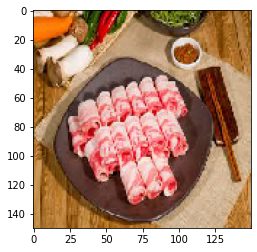

In [16]:
# 개가 1이고 고양이가 0 인것을 확인 하는 방법
print(y_train[3])
plt.imshow(sample_training_images[3,:,:])

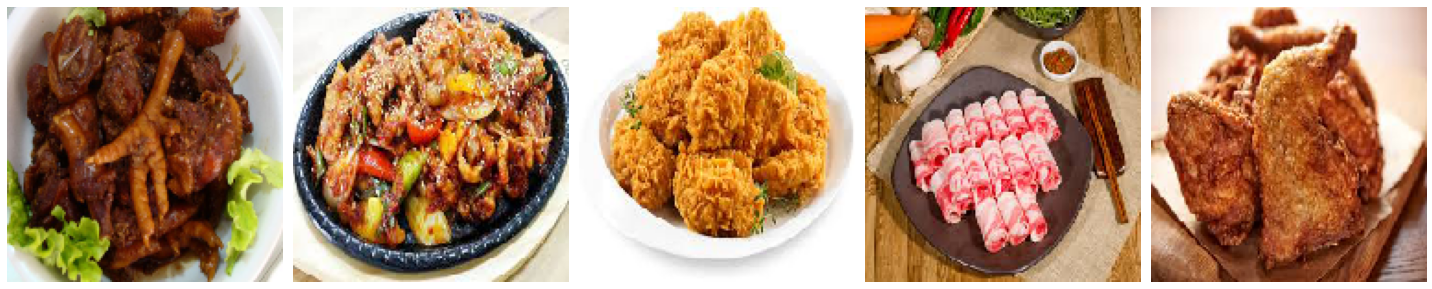

In [17]:
plotImages(sample_training_images[:5])

In [18]:
model= Sequential([
    Conv2D(32, 3, padding='same', activation='relu', 
           input_shape=(150, 150 ,3)),
    MaxPooling2D(),
    Dropout(0.1),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(100, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.1),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.1),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 100)       57700     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 100)       0

In [20]:
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [21]:
# parameter 갯수 엑셀로 다시 확인해 보자. 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 100)       57700     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 100)       0

In [24]:
# 학습시키는 방법이 살짝 다르다. 
# 파이썬에서 // 연산자는 나누기 연산 후 소수점 이하의 수를 버리고 정수 부분만을 택함 
# train과 Validation 동시수행

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=9,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/10
9/9 [==============================] - 29s 3s/step - loss: 1.1816 - accuracy: 0.5998 - val_loss: 1.2217 - val_accuracy: 0.5703
Epoch 2/10
9/9 [==============================] - 27s 3s/step - loss: 1.1773 - accuracy: 0.5861 - val_loss: 1.2035 - val_accuracy: 0.5977
Epoch 3/10
9/9 [==============================] - 28s 3s/step - loss: 1.1065 - accuracy: 0.6042 - val_loss: 1.2503 - val_accuracy: 0.6250
Epoch 4/10
9/9 [==============================] - 28s 3s/step - loss: 1.1102 - accuracy: 0.6196 - val_loss: 1.2352 - val_accuracy: 0.5781
Epoch 5/10
9/9 [==============================] - 28s 3s/step - loss: 1.0114 - accuracy: 0.6719 - val_loss: 1.3081 - val_accuracy: 0.5859
Epoch 6/10
9/9 [==============================] - 29s 3s/step - loss: 1.0312 - accuracy: 0.6319 - val_loss: 1.2023 - val_accuracy: 0.5938
Epoch 7/10
9/9 [==============================] - 28s 3s/step - loss: 0.9125 - accuracy: 0.6848 - val_loss: 1.2662 - val_accuracy: 0.6055
Epoch 8/10
9/9 [==================

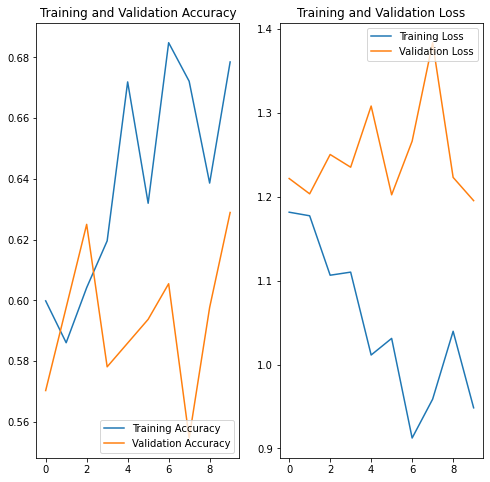

In [25]:
# 학습 결과값을 그래픽으로 보자. 
# 대략적으로 70% 정확도 갖고 epoch 숫자는 12~ 13회 사이가 적당한것으로 추정

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
sample_validation_images, y_validation = next(val_data_gen)

In [27]:
model.predict(sample_validation_images[[2]])

array([[0.06225312, 0.00745485, 0.03413479, 0.0173886 , 0.6770289 ,
        0.01850461, 0.04127723, 0.11539972, 0.00785779, 0.01870044]],
      dtype=float32)

In [28]:
y_validation[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [29]:
plt.imshow(sample_validation_images[2].reshape(IMG_HEIGHT, IMG_WIDTH),cmap="gray")

ValueError: cannot reshape array of size 67500 into shape (150,150)

In [30]:
len(val_data_gen[0])

2

In [31]:
#자 이제 정확도를 올려 보자.  Overfitting 문제도 해결하고
# image Augmentation and Visualize data
# horizontal_flip= True로 세팅하면 이미지를 augmatation 한다. 

image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [32]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               color_mode="grayscale",
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 2000 images belonging to 10 classes.


In [33]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

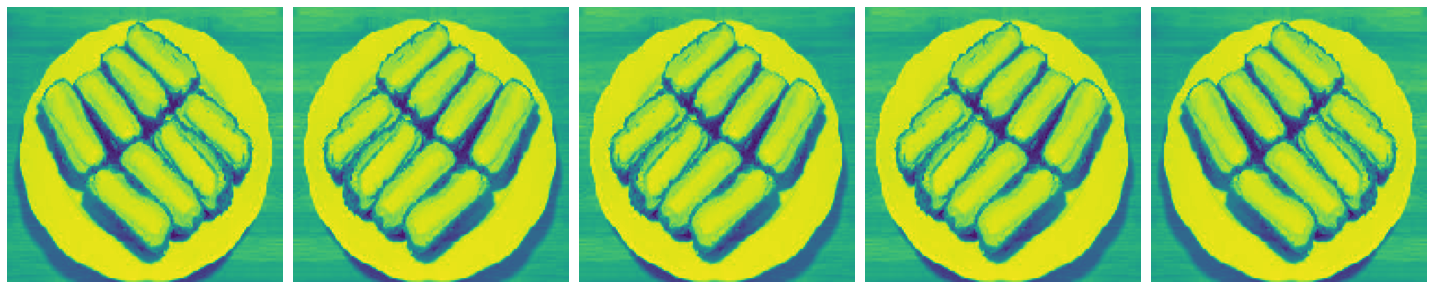

In [34]:
plotImages(augmented_images)

In [35]:
# 정해진 각도 사이로 랜덤하게 돌려 보자
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [36]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               color_mode="grayscale",
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 10 classes.


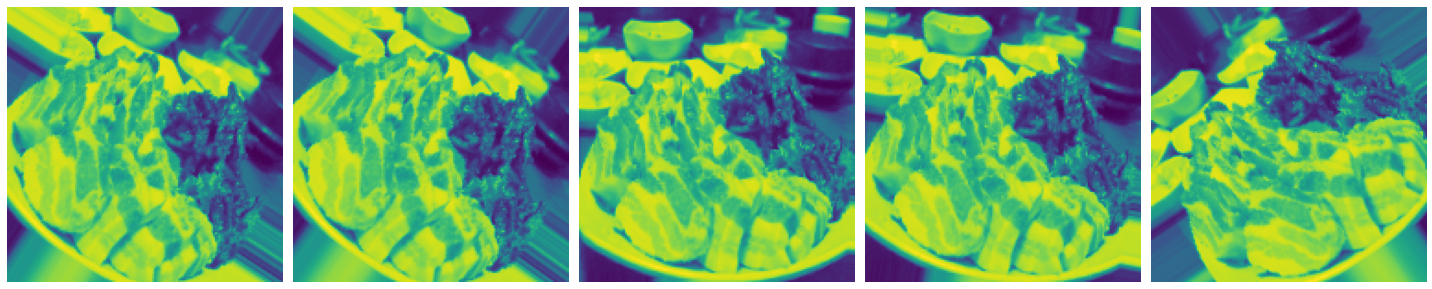

In [37]:
plotImages(augmented_images)

In [38]:
# 줌으로 당겼다. 밀었다 했보자. 
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [39]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               color_mode="grayscale",
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 2000 images belonging to 10 classes.


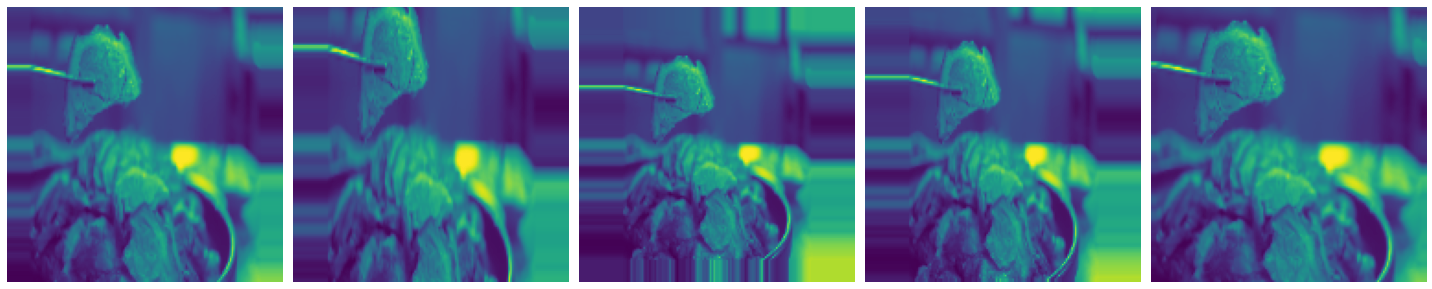

In [40]:
plotImages(augmented_images)

In [41]:
# 모두 합쳐보자. 
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=25,
                    width_shift_range=.1,
                    height_shift_range=.1,
                    brightness_range=[.2, .2],
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


In [42]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     color_mode="grayscale",
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

Found 2000 images belonging to 10 classes.


In [43]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [44]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                  color_mode="grayscale",
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

Found 300 images belonging to 10 classes.


In [45]:
model_new = Sequential([
    Conv2D(64, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,1)),
    MaxPooling2D(),
    Dropout(0.25),
#     Conv2D(256, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.1),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

In [46]:
model_new.compile(optimizer='Nadam',
                  loss="categorical_crossentropy",
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 150, 150, 64)      640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 64)       

In [48]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=9,
    epochs=20,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/20


InvalidArgumentError:  logits and labels must be broadcastable: logits_size=[128,4] labels_size=[128,10]
	 [[node categorical_crossentropy/softmax_cross_entropy_with_logits (defined at <ipython-input-48-83988d60505b>:1) ]] [Op:__inference_train_function_4533]

Function call stack:
train_function


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [ ]:
val_data_gen1 = image_gen_val.flow_from_directory(batch_size=40,
                                                 directory=validation_dir,
                                                  color_mode="grayscale",
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')

In [ ]:
test_x, test_y = next(val_data_gen1)

In [ ]:
test_loss, test_acc = model_new.evaluate(test_x,  test_y, verbose=2)